Lab 10: Regression 

Kobie Williams 

3/8/2022 

The purpose of this lab is to predict continuous values using regression 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1XHF2E7uXPqXSmGi2X1E9_o9VmIh89bfV') 
df.head(5)

,x,y,is_train
0,0.000799,1.699337,1.0
1,0.010214,-0.436091,1.0
2,0.071439,-1.873174,1.0
3,0.076680,15.854541,1.0
4,0.115109,-0.831285,1.0


In [29]:
#Pandas Series 

#Creating Xtrain variable 
Xtrain = df['x'][df['is_train'] == 1] 

#Creating ytrain variable 
ytrain = df['y'][df['is_train'] == 1] 

#Creating Xtest variable 
Xtest = df['x'][df['is_train'] == 0] 

#Creating ytest variable
ytest = df['y'][df['is_train'] == 0] 

In [30]:
#NumPy arrays 

#Creating Xtrain variable 
Xtrain = df['x'][df['is_train'] == 1].values.reshape((-1,1))

#Creating ytrain variable 
ytrain = df['y'][df['is_train'] == 1].values.reshape((-1,1))

#Creating Xtest variable 
Xtest = df['x'][df['is_train'] == 0].values.reshape((-1,1))

#Creating ytest variable
ytest = df['y'][df['is_train'] == 0].values.reshape((-1,1))

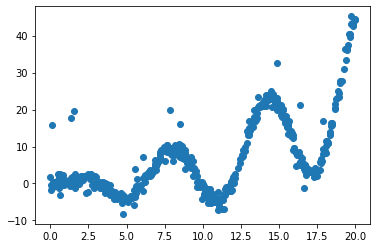

In [31]:
#Scatterplot of the data 

plt.scatter(Xtrain, ytrain) 

In [32]:
from sklearn.preprocessing import PolynomialFeatures 

In [33]:
from sklearn.pipeline import make_pipeline 

poly_model = make_pipeline(PolynomialFeatures(4), LinearRegression()) 

In [34]:
poly_model.fit(Xtrain, ytrain) 

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [35]:
#Predict the test data 
yfit = poly_model.predict(Xtest) 

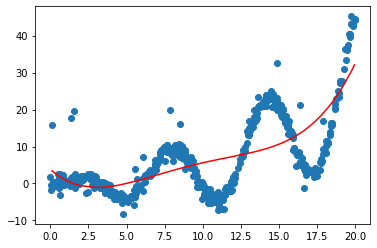

In [36]:
#Show predictions on our data 
plt.scatter(Xtrain, ytrain)
#Plot our line  
plt.plot(Xtest, yfit, 'r') 

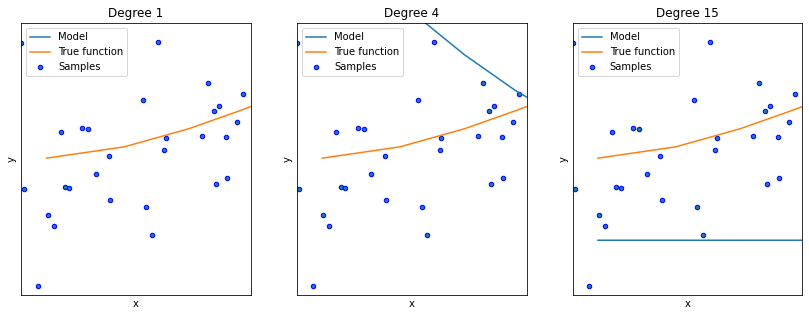

In [37]:
#Simple to complex models 
degrees = [1,4,15] 

plt.figure(figsize=(14,5)) 

#Loop over each model 
for i in range(len(degrees)): 
  ax = plt.subplot(1,len(degrees), i + 1) 
  plt.setp(ax, xticks=(), yticks=()) 

  poly_model = make_pipeline(PolynomialFeatures(degrees[i]), LinearRegression()) 

  poly_model.fit(Xtrain, ytrain) 

  plt.plot(Xtest, poly_model.predict(Xtest), label="Model")
  plt.plot(Xtest, ytest, label="True function")
  plt.scatter(Xtrain, ytrain, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title("Degree {}".format(degrees[i]))

plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())

poly_model.fit(Xtrain, ytrain)
ypred = poly_model.predict(Xtest)

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)

print('MAE: {:.4f}, MSE: {:.4f}'.format(mae, mse)) 


MAE: 6.2029, MSE: 63.5673


In [39]:
poly_model = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())

poly_model.fit(Xtrain, ytrain)
ypred = poly_model.predict(Xtest)

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)

print('MAE: {:.4f}, MSE: {:.4f}'.format(mae, mse))


MAE: 5.5844, MSE: 50.4123


MAE: 1.6709, MSE: 4.6215degree: 15
MAE: 1.2164, MSE: 3.2042degree: 16
MAE: 1.3376, MSE: 2.7855degree: 17


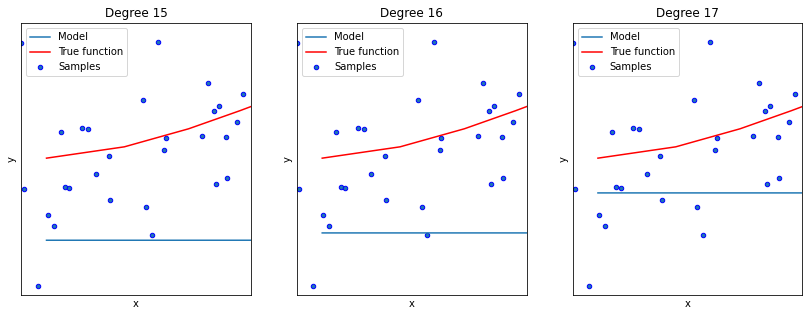

In [52]:
#Best MAE experiments 
#Simple to complex models 
degrees = [15,16,17] 

plt.figure(figsize=(14,5)) 

#Loop over each model 
for i in range(len(degrees)): 
  ax = plt.subplot(1,len(degrees), i + 1) 
  plt.setp(ax, xticks=(), yticks=()) 

  poly_model = make_pipeline(PolynomialFeatures(degrees[i]), LinearRegression()) 

  poly_model.fit(Xtrain, ytrain) 
  ypred = poly_model.predict(Xtest)

  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)

  print('MAE: {:.4f}, MSE: {:.4f}'.format(mae, mse) + 'degree: ' + str(degrees[i]))

  plt.plot(Xtest, poly_model.predict(Xtest), label="Model")
  plt.plot(Xtest, ytest, label="True function", color='red')
  plt.scatter(Xtrain, ytrain, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title("Degree {}".format(degrees[i]))


plt.show()

In [ ]:
#The best MAE we can get is with 16 degrees 